<Axes: >

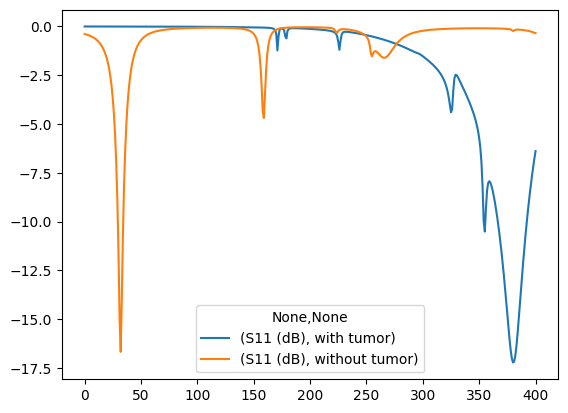

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df1 = pd.read_csv('/kaggle/input/dataset-with-tumor/s11_14_tumor.csv')
df2 = pd.read_csv('/kaggle/input/dataset-without-tumor/S11_simulated_1.4ghz_withouttumor.csv')
df1 = df1.drop(['Phase'], axis=1)
df2 = df2.drop(['Phase'], axis=1)
df1 = df1.drop(['Freq [GHz]'], axis=1)
df2 = df2.drop(['Freq [GHz]'], axis=1)
df_diff = df1.compare(df2)

# Visualize the differences
df_diff = df_diff.rename(columns={'self': 'with tumor','other':'without tumor'})
df_diff.head()
df_diff.plot()

['Diagnosis', 'Freq [GHz]', 'S11 (dB)', 'Phase']
0.8547717842323651


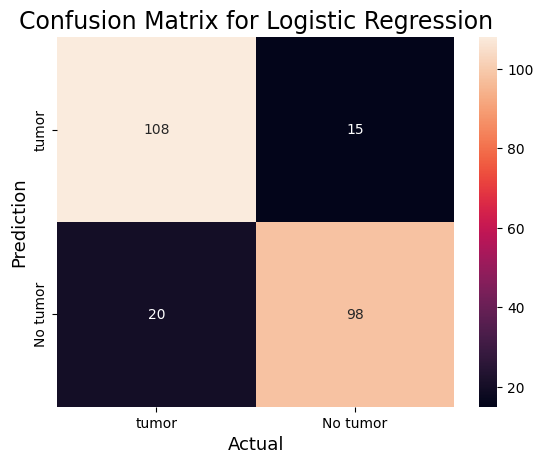

Accuracy   : 0.8547717842323651
Precision : 0.8672566371681416
Recall    : 0.8305084745762712
F1-score  : 0.8484848484848485


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/kaggle/input/dataset-with-or-without-tumor/dataset_1.csv")
df.head()

df.columns

l = list(df.columns)
print(l)

# To check what value does the Diagnosis field have
df['Diagnosis'].unique()
# 1 stands for there is a tumor, 0 stands for no tumor
df['Diagnosis'].value_counts()

df.shape
df.describe()


X = df.drop(['Diagnosis'], axis=1)

X.head()

y = df['Diagnosis']
y.head()

# divide the dataset into train and test set
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
df.shape

 
X_train.shape

 
X_test.shape

 
y_train.shape

 
y_test.shape

 
X_train.head(1)

 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
 
X_train


# apply Logistic Regression
 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
 
# implemented our model through logistic regression
y_pred = lr.predict(X_test)
y_pred


lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['tumor', 'No tumor'],
            yticklabels=['tumor', 'No tumor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Logistic Regression',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

